In [1]:
import pandas as pd
import os

# List of columns to ignore
ignore_columns = [
    'sunday_from_time1', 'sunday_to_time1', 'sunday_from_time2', 'sunday_to_time2',
    'monday_from_time1', 'monday_to_time1', 'monday_from_time2', 'monday_to_time2',
    'tuesday_from_time1', 'tuesday_to_time1', 'tuesday_from_time2', 'tuesday_to_time2',
    'wednesday_from_time1', 'wednesday_to_time1', 'wednesday_from_time2', 'wednesday_to_time2',
    'thursday_from_time1', 'thursday_to_time1', 'thursday_from_time2', 'thursday_to_time2',
    'friday_from_time1', 'friday_to_time1', 'friday_from_time2', 'friday_to_time2',
    'saturday_from_time1', 'saturday_to_time1', 'saturday_from_time2', 'saturday_to_time2'
]

# Folder containing CSV files
folder_path = "/home/kerupakaran/Videos/AnyDesk/CSV/"

# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Dictionary to store DataFrames
dataframes = {}

for file in csv_files:
    file_path = os.path.join(folder_path, file)
    print(f"Processing file: {file}")
    
    # Read the CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Drop the columns to be ignored
    df_filtered = df.drop(columns=[col for col in ignore_columns if col in df.columns], errors='ignore')
    
    # Store the filtered DataFrame in the dictionary
    dataframes[file] = df_filtered
    
    # Display column details
    print("Remaining Columns:")
    print(df_filtered.columns.tolist())
    print("\n")

# Access the DataFrames by their filenames, e.g., dataframes['example.csv']


Processing file: orders.csv


/tmp/ipykernel_33323/1548992922.py:29: DtypeWarning: Columns (15,16,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Remaining Columns:
['akeed_order_id', 'customer_id', 'item_count', 'grand_total', 'payment_mode', 'promo_code', 'vendor_discount_amount', 'promo_code_discount_percentage', 'is_favorite', 'is_rated', 'vendor_rating', 'driver_rating', 'deliverydistance', 'preparationtime', 'delivery_time', 'order_accepted_time', 'driver_accepted_time', 'ready_for_pickup_time', 'picked_up_time', 'delivered_time', 'delivery_date', 'vendor_id', 'created_at', 'LOCATION_NUMBER', 'LOCATION_TYPE', 'CID X LOC_NUM X VENDOR']


Processing file: vendors.csv
Remaining Columns:
['id', 'authentication_id', 'latitude', 'longitude', 'vendor_category_en', 'vendor_category_id', 'delivery_charge', 'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2', 'prepration_time', 'commission', 'is_akeed_delivering', 'discount_percentage', 'status', 'verified', 'rank', 'language', 'vendor_rating', 'primary_tags', 'open_close_flags', 'vendor_tag', 'vendor_tag_name', 'one_click_vendor', 'country_id', 'city_id', 'created_at', 'up

/tmp/ipykernel_33323/1548992922.py:29: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


Remaining Columns:
['customer_id', 'gender', 'status_x', 'verified_x', 'created_at_x', 'updated_at_x', 'location_number', 'location_type', 'latitude_x', 'longitude_x', 'id', 'authentication_id', 'latitude_y', 'longitude_y', 'vendor_category_en', 'vendor_category_id', 'delivery_charge', 'serving_distance', 'is_open', 'OpeningTime', 'OpeningTime2', 'prepration_time', 'commission', 'is_akeed_delivering', 'discount_percentage', 'status_y', 'verified_y', 'rank', 'language', 'vendor_rating', 'primary_tags', 'open_close_flags', 'vendor_tag', 'vendor_tag_name', 'one_click_vendor', 'country_id', 'city_id', 'created_at_y', 'updated_at_y', 'device_type', 'display_orders', 'location_number_obj', 'id_obj', 'CID X LOC_NUM X VENDOR', 'target']




In [2]:
# Example: Access the DataFrame for a specific file
df_orders = dataframes['orders.csv']
df_train_customers=dataframes['train_customers.csv']
df_train_full=dataframes['train_full.csv']
df_train_locations=dataframes['train_locations.csv']
df_vendors=dataframes['vendors.csv']

df_orders.columns = df_orders.columns.str.replace(' ', '_')

In [3]:
# Function to print column names, types, and sample values
def print_column_details(df, df_name):
    print(f"Column Details for {df_name},,")
    for col in df.columns:
        sample_value = df[col].iloc[0] if not df[col].isnull().all() else "NULL"
        print(f"{col},{df[col].dtypes},{sample_value}")
    print("\n")

# Example: Print column details for each DataFrame
dataframes = {
    "orders.csv": df_orders,
    "train_customers.csv": df_train_customers,
    "train_full.csv": df_train_full,
    "train_locations.csv": df_train_locations,
    "vendors.csv": df_vendors,
}

for name, df in dataframes.items():
    print_column_details(df, name)


Column Details for orders.csv,,
akeed_order_id,float64,163238.0
customer_id,object,92PEE24
item_count,float64,1.0
grand_total,float64,7.6
payment_mode,int64,2
promo_code,object,nan
vendor_discount_amount,float64,0.0
promo_code_discount_percentage,float64,nan
is_favorite,object,nan
is_rated,object,No
vendor_rating,float64,nan
driver_rating,float64,0.0
deliverydistance,float64,0.0
preparationtime,float64,nan
delivery_time,object,nan
order_accepted_time,object,nan
driver_accepted_time,object,nan
ready_for_pickup_time,object,nan
picked_up_time,object,nan
delivered_time,object,nan
delivery_date,object,2019-07-31 05:30:00
vendor_id,int64,105
created_at,object,2019-08-01 05:30:16
LOCATION_NUMBER,int64,0
LOCATION_TYPE,object,nan
CID_X_LOC_NUM_X_VENDOR,object,92PEE24 X 0 X 105


Column Details for train_customers.csv,,
akeed_customer_id,object,TCHWPBT
gender,object,Male
dob,float64,nan
status,int64,1
verified,int64,1
language,object,EN
created_at,object,2018-02-07 19:16:23
updated_at,object,201

In [5]:
# Find duplicate rows based on 'akeed_customer_id'
duplicates = df_train_customers[df_train_customers['akeed_customer_id'].duplicated(keep=False)]



# Sort by 'akeed_customer_id' and 'updated_at' (latest first)
duplicates_sorted = df_train_customers.sort_values(by=['akeed_customer_id', 'updated_at'], ascending=[True, False])

# Drop duplicates while keeping the latest 'updated_at'
cleaned_df_train_customers = duplicates_sorted.drop_duplicates(subset='akeed_customer_id', keep='first')

print("Rows with Latest 'updated_at' for Each Duplicate 'akeed_customer_id':")

cleaned_df_train_customers

Rows with Latest 'updated_at' for Each Duplicate 'akeed_customer_id':


,akeed_customer_id,gender,dob,status,verified,language,created_at,updated_at
5023,000THBA,Male,NaN,1,1,EN,2018-11-14 13:50:26,2018-11-14 13:50:25
10849,001XN9X,Male,1973.0,1,1,EN,2019-03-29 23:16:34,2019-03-29 23:16:34
29977,001ZNTK,NaN,NaN,1,1,NaN,2020-01-30 22:05:00,2020-01-30 22:05:18
13372,002510Y,NaN,NaN,1,1,EN,2019-06-14 02:28:19,2019-10-01 18:46:07
26534,005ECL6,male,NaN,1,1,NaN,2019-12-30 11:44:14,2019-12-30 11:45:06
...,...,...,...,...,...,...,...,...
13396,ZZVGIVK,NaN,NaN,1,1,EN,2019-06-14 21:57:16,2019-10-01 18:46:11
5473,ZZVLIB5,Male,NaN,1,1,EN,2018-11-27 15:22:33,2018-11-27 15:22:32
5016,ZZWKMGG,Male,NaN,1,1,EN,2018-11-13 23:24:23,2018-11-13 23:24:23
18831,ZZY3N0D,Male,NaN,1,0,EN,2019-09-17 18:52:40,2019-11-16 16:28:06


In [6]:
# Find duplicate rows based on 'akeed_customer_id'
duplicates = df_vendors[df_vendors['id'].duplicated(keep=False)]
duplicates
# No duplicates for vendors

,id,authentication_id,latitude,longitude,vendor_category_en,vendor_category_id,delivery_charge,serving_distance,is_open,OpeningTime,...,open_close_flags,vendor_tag,vendor_tag_name,one_click_vendor,country_id,city_id,created_at,updated_at,device_type,display_orders


In [7]:
# Find duplicate rows based on 'akeed_customer_id'
duplicates = df_train_locations[df_train_locations['customer_id'].duplicated(keep=False)]
duplicates
# No duplicates for vendors

,customer_id,location_number,location_type,latitude,longitude
0,02SFNJH,0,NaN,1.682392,-78.789737
1,02SFNJH,1,NaN,1.679137,0.766823
2,02SFNJH,2,NaN,-0.498648,0.661241
6,NDYLK9A,0,NaN,-0.203280,-78.566885
7,NDYLK9A,1,NaN,-0.204371,0.435593
...,...,...,...,...,...
59498,9PP42SA,2,NaN,-0.788515,-78.497721
59499,9PP42SA,3,Home,-1.445114,0.072558
59500,9PP42SA,4,NaN,-0.001785,0.431695
59501,HWELAU8,0,NaN,-0.066291,-78.583075


In [8]:
# Find duplicates based on 'akeed_order_id'
duplicates = df_orders[df_orders.duplicated(subset=['akeed_order_id'], keep=False)]

# Show distinct entries from these duplicates
distinct_duplicates = duplicates.drop_duplicates(subset=['akeed_order_id'])

df_orders


,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID_X_LOC_NUM_X_VENDOR
0,163238.0,92PEE24,1.0,7.6,2,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,105,2019-08-01 05:30:16,0,NaN,92PEE24 X 0 X 105
1,163240.0,QS68UD8,1.0,8.7,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,294,2019-08-01 05:31:10,0,Work,QS68UD8 X 0 X 294
2,163241.0,MB7VY5F,2.0,14.4,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:31:33,0,NaN,MB7VY5F X 0 X 83
3,163244.0,KDJ951Y,1.0,7.1,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,90,2019-08-01 05:34:54,0,Home,KDJ951Y X 0 X 90
4,163245.0,BAL0RVT,4.0,27.2,1,NaN,0.0,NaN,NaN,No,...,NaN,NaN,NaN,NaN,2019-07-31 05:30:00,83,2019-08-01 05:35:51,0,Work,BAL0RVT X 0 X 83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135298,415507.0,L6LFY6H,1.0,13.3,2,NaN,0.0,0.0,No,No,...,2020-02-29 23:59:21,2020-03-01 00:02:10,2020-03-01 00:22:53,2020-03-01 00:29:42,NaN,67,2020-02-29 23:47:59,0,NaN,L6LFY6H X 0 X 67
135299,415508.0,2GMMVGI,3.0,9.5,1,NaN,0.0,0.0,No,Yes,...,2020-03-01 00:19:46,2020-03-01 00:20:05,2020-03-01 00:27:50,2020-03-01 01:03:14,NaN,79,2020-02-29 23:48:37,0,Work,2GMMVGI X 0 X 79
135300,415510.0,LYTAAV0,4.0,18.2,2,NaN,0.0,0.0,No,No,...,2020-03-01 00:04:28,2020-03-01 00:10:34,2020-03-01 00:14:43,2020-03-01 00:36:37,NaN,28,2020-02-29 23:48:43,2,Other,LYTAAV0 X 2 X 28
135301,415512.0,NEV9A5D,3.0,7.7,1,NUE5BZAA7,0.0,0.0,No,No,...,2020-03-01 00:06:14,2020-03-01 00:08:10,2020-03-01 00:22:11,2020-03-01 00:36:52,NaN,841,2020-02-29 23:50:10,0,NaN,NEV9A5D X 0 X 841


In [9]:
# Find duplicate rows based on 'akeed_customer_id'
duplicates = df_orders[df_orders['akeed_order_id'].duplicated(keep=False)]
duplicates
# No duplicates for vendors

# Find duplicate rows based on 'akeed_customer_id'


# Sort by 'akeed_customer_id' and 'updated_at' (latest first)
duplicates_sorted = df_orders.sort_values(by=['akeed_order_id', 'order_accepted_time'], ascending=[True, False])

# Drop duplicates while keeping the latest 'updated_at'
cleaned_df_orders = duplicates_sorted.drop_duplicates(subset='akeed_order_id', keep='first')

print("Rows with Latest 'updated_at' for Each Duplicate 'akeed_customer_id':")

cleaned_df_orders



Rows with Latest 'updated_at' for Each Duplicate 'akeed_customer_id':


,akeed_order_id,customer_id,item_count,grand_total,payment_mode,promo_code,vendor_discount_amount,promo_code_discount_percentage,is_favorite,is_rated,...,driver_accepted_time,ready_for_pickup_time,picked_up_time,delivered_time,delivery_date,vendor_id,created_at,LOCATION_NUMBER,LOCATION_TYPE,CID_X_LOC_NUM_X_VENDOR
41620,11044.0,JNVC68C,NaN,7.6,1,NaN,0.0,NaN,No,No,...,NaN,NaN,NaN,NaN,NaN,20,2019-10-11 00:35:51,2,NaN,JNVC68C X 2 X 20
41584,11045.0,UFIT0C2,NaN,10.5,1,NaN,0.0,NaN,No,No,...,NaN,NaN,NaN,NaN,NaN,20,2019-10-11 00:34:29,0,NaN,UFIT0C2 X 0 X 20
41624,11046.0,CU053IJ,NaN,16.5,1,NaN,0.0,NaN,No,No,...,NaN,NaN,NaN,NaN,NaN,20,2019-10-11 00:35:55,0,NaN,CU053IJ X 0 X 20
41606,11048.0,L40FX80,NaN,20.5,1,NaN,0.0,NaN,No,No,...,NaN,NaN,NaN,NaN,NaN,20,2019-10-11 00:35:18,0,NaN,L40FX80 X 0 X 20
41597,11049.0,GSY07AM,NaN,30.4,1,NaN,0.0,NaN,No,No,...,NaN,NaN,NaN,NaN,NaN,20,2019-10-11 00:35:01,1,NaN,GSY07AM X 1 X 20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135299,415508.0,2GMMVGI,3.0,9.5,1,NaN,0.0,0.0,No,Yes,...,2020-03-01 00:19:46,2020-03-01 00:20:05,2020-03-01 00:27:50,2020-03-01 01:03:14,NaN,79,2020-02-29 23:48:37,0,Work,2GMMVGI X 0 X 79
135300,415510.0,LYTAAV0,4.0,18.2,2,NaN,0.0,0.0,No,No,...,2020-03-01 00:04:28,2020-03-01 00:10:34,2020-03-01 00:14:43,2020-03-01 00:36:37,NaN,28,2020-02-29 23:48:43,2,Other,LYTAAV0 X 2 X 28
135301,415512.0,NEV9A5D,3.0,7.7,1,NUE5BZAA7,0.0,0.0,No,No,...,2020-03-01 00:06:14,2020-03-01 00:08:10,2020-03-01 00:22:11,2020-03-01 00:36:52,NaN,841,2020-02-29 23:50:10,0,NaN,NEV9A5D X 0 X 841
135302,415515.0,77KCRC1,1.0,6.8,2,NaN,0.0,0.0,No,No,...,2020-03-01 00:07:21,2020-03-01 00:14:12,2020-03-01 00:21:33,2020-03-01 00:28:06,NaN,79,2020-02-29 23:52:14,4,NaN,77KCRC1 X 4 X 79


In [10]:
import sqlite3
import os
import pandas as pd

# Clean the data if needed
# Example: Replace NaN values with a placeholder
# customers_df.fillna(value={"dob": None}, inplace=True)  # Replace NaN dob with None
# vendors_df.fillna(value={"authentication_id": None}, inplace=True)  # Replace NaN auth_id with None

# Define the database file name
db_file = "database.db"

# Check if the file exists and delete it
if os.path.exists(db_file):
    os.remove(db_file)
    print(f"{db_file} has been deleted.")
else:
    print(f"{db_file} does not exist. Creating a new database.")

# Create a new SQLite database connection
conn = sqlite3.connect(db_file)
print(f"Connected to {db_file}.")
cursor = conn.cursor()

# Create Customer Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS customer (
    akeed_customer_id TEXT PRIMARY KEY,
    gender TEXT,
    dob DATE,
    status INTEGER,
    verified INTEGER,
    language TEXT,
    created_at TEXT,
    updated_at TEXT
);
''')

# Create Vendor Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS vendor (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    authentication_id REAL,
    latitude REAL,
    longitude REAL,
    vendor_category_en TEXT,
    vendor_category_id REAL,
    delivery_charge REAL,
    serving_distance REAL,
    is_open REAL,
    OpeningTime TEXT,
    OpeningTime2 TEXT,
    prepration_time INTEGER,
    commission REAL,
    is_akeed_delivering TEXT,
    discount_percentage REAL,
    status REAL,
    verified INTEGER,
    rank INTEGER,
    language TEXT,
    vendor_rating REAL,
    primary_tags TEXT,
    open_close_flags REAL,
    vendor_tag TEXT,
    vendor_tag_name TEXT,
    one_click_vendor TEXT,
    country_id REAL,
    city_id REAL,
    created_at TEXT,
    updated_at TEXT,
    device_type INTEGER,
    display_orders INTEGER
);
''')

# Create Locations Table
cursor.execute('''
CREATE TABLE IF NOT EXISTS location (
    customer_id TEXT,
    location_number INTEGER,
    location_type TEXT,
    latitude REAL,
    longitude REAL,
    FOREIGN KEY (customer_id) REFERENCES customer(akeed_customer_id)
);
''')

# Insert data into Customer Table
cleaned_df_train_customers.to_sql("customer", conn, if_exists="append", index=False)

# Insert data into Vendor Table
df_vendors.to_sql("vendor", conn, if_exists="append", index=False)

# Insert data into Locations Table
df_train_locations.to_sql("location", conn, if_exists="append", index=False)


cursor.execute('''
CREATE TABLE IF NOT EXISTS orders (
    akeed_order_id REAL PRIMARY KEY,
    customer_id TEXT,
    item_count INTEGER,
    grand_total REAL,
    payment_mode INTEGER,
    promo_code TEXT,
    vendor_discount_amount REAL,
    promo_code_discount_percentage REAL,
    is_favorite TEXT,
    is_rated TEXT,
    vendor_rating REAL,
    driver_rating REAL,
    deliverydistance REAL,
    preparationtime REAL,
    delivery_time TEXT,
    order_accepted_time TEXT,
    driver_accepted_time TEXT,
    ready_for_pickup_time TEXT,
    picked_up_time TEXT,
    delivered_time TEXT,
    delivery_date TEXT,
    vendor_id INTEGER,
    created_at TEXT,
    LOCATION_NUMBER INTEGER,
    LOCATION_TYPE TEXT,
    CID_X_LOC_NUM_X_VENDOR TEXT,
    FOREIGN KEY(customer_id) REFERENCES customer(akeed_customer_id),
    FOREIGN KEY(vendor_id) REFERENCES vendor(id)
);
''')

cleaned_df_orders.to_sql("orders", conn, if_exists="append", index=False)

# Commit and close the connection
conn.commit()
conn.close()

print("Data inserted successfully into customers, vendors, and locations tables.")


database.db has been deleted.
Connected to database.db.
Data inserted successfully into customers, vendors, and locations tables.


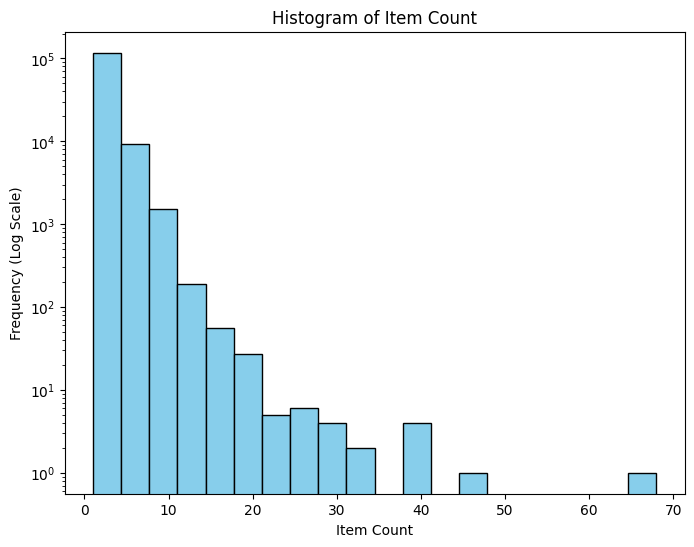

In [11]:
import tkinter as tk
from tkinter import messagebox
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import uuid  # Import for generating unique IDs


# Database file
DB_FILE = "database.db"

# Connect to the database
def connect_to_db():
    return sqlite3.connect(DB_FILE)

# Add a new customer to the database
def add_customer():
    try:
        conn = connect_to_db()
        cursor = conn.cursor()
        akeed_customer_id = str(uuid.uuid4())  
        
        gender = gender_var.get()
        dob = dob_var.get()
        status = int(status_var.get())
        verified = int(verified_var.get())
        language = language_var.get()
        created_at = created_at_var.get()
        updated_at = updated_at_var.get()
        
        # Insert customer into the database
        cursor.execute('''
        INSERT INTO customer (akeed_customer_id, gender, dob, status, verified, language, created_at, updated_at)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?)
        ''', (akeed_customer_id,gender, dob, status, verified, language, created_at, updated_at))
        
        conn.commit()
        conn.close()
        messagebox.showinfo("Success", "Customer added successfully!")
    except Exception as e:
        messagebox.showerror("Error", f"An error occurred: {e}")

# Display mean, max, min of grand_total
def show_grand_total_stats():
    conn = connect_to_db()
    df = pd.read_sql_query("SELECT grand_total FROM orders", conn)
    conn.close()
    
    mean_val = df['grand_total'].mean()
    max_val = df['grand_total'].max()
    min_val = df['grand_total'].min()
    
    messagebox.showinfo("Grand Total Stats", f"Mean: {mean_val:.2f}\nMax: {max_val:.2f}\nMin: {min_val:.2f}")

# Plot histogram of item_count
def plot_item_count_histogram():
    conn = connect_to_db()
    df = pd.read_sql_query("SELECT item_count FROM orders", conn)
    conn.close()
    
    plt.figure(figsize=(8, 6))
    plt.hist(df['item_count'], bins=20, log=True, color='skyblue', edgecolor='black')
    plt.xlabel("Item Count")
    plt.ylabel("Frequency (Log Scale)")
    plt.title("Histogram of Item Count")
    plt.show()

# Show customers with orders > 40 items
def show_customers_large_orders():
    conn = connect_to_db()
    query = '''
    SELECT DISTINCT customer_id
    FROM orders
    WHERE item_count > 40
    '''
    df = pd.read_sql_query(query, conn)
    conn.close()
    
    customers = df['customer_id'].tolist()
    customer_list = "\n".join(customers)
    messagebox.showinfo("Customers with >40 Items", f"Customer IDs:\n{customer_list}")

# Main GUI
root = tk.Tk()
root.title("Customer and Order Dashboard")

# Input fields for adding a customer
tk.Label(root, text="Add New Customer").grid(row=0, columnspan=2)

tk.Label(root, text="Gender:").grid(row=1, column=0)
gender_var = tk.StringVar()
tk.Entry(root, textvariable=gender_var).grid(row=1, column=1)

tk.Label(root, text="DOB:").grid(row=2, column=0)
dob_var = tk.StringVar()
tk.Entry(root, textvariable=dob_var).grid(row=2, column=1)

tk.Label(root, text="Status:").grid(row=3, column=0)
status_var = tk.StringVar()
tk.Entry(root, textvariable=status_var).grid(row=3, column=1)

tk.Label(root, text="Verified:").grid(row=4, column=0)
verified_var = tk.StringVar()
tk.Entry(root, textvariable=verified_var).grid(row=4, column=1)

tk.Label(root, text="Language:").grid(row=5, column=0)
language_var = tk.StringVar()
tk.Entry(root, textvariable=language_var).grid(row=5, column=1)

tk.Label(root, text="Created At:").grid(row=6, column=0)
created_at_var = tk.StringVar()
tk.Entry(root, textvariable=created_at_var).grid(row=6, column=1)

tk.Label(root, text="Updated At:").grid(row=7, column=0)
updated_at_var = tk.StringVar()
tk.Entry(root, textvariable=updated_at_var).grid(row=7, column=1)

tk.Button(root, text="Add Customer", command=add_customer).grid(row=8, columnspan=2)

# Buttons for database queries
tk.Button(root, text="Show Grand Total Stats", command=show_grand_total_stats).grid(row=9, columnspan=2)
tk.Button(root, text="Plot Item Count Histogram", command=plot_item_count_histogram).grid(row=10, columnspan=2)
tk.Button(root, text="Show Customers with >40 Items", command=show_customers_large_orders).grid(row=11, columnspan=2)

# Run the GUI
root.mainloop()
